In [2]:
import numpy as np
import pandas as pd

# Getting the data

DataSet = pd.read_csv('./input/house_Rent_Dataset.csv')


In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

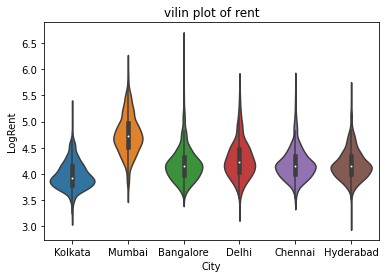

In [4]:
DataSet['LogRent'] = np.log10(DataSet['Rent'])
DataSet['LogSize'] = np.log10(DataSet['Size'])
sns.violinplot(data = DataSet,x='City',y='LogRent')
plt.title('vilin plot of rent')
plt.show()

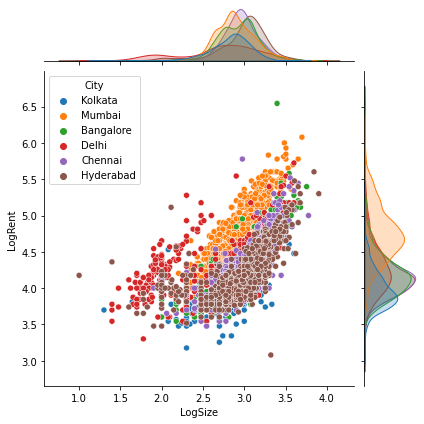

In [5]:
sns.jointplot(data=DataSet,x='LogSize',y='LogRent',hue='City')
plt.show()

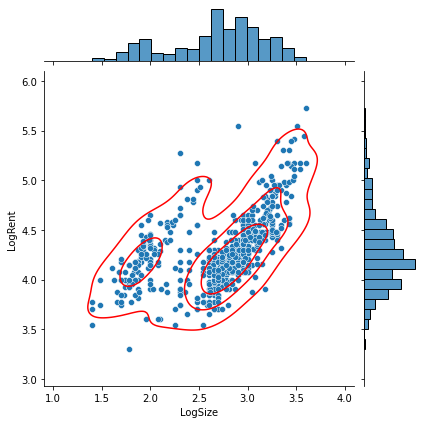

In [6]:
g = sns.jointplot(data=DataSet[DataSet['City'] == 'Delhi'],x='LogSize',y='LogRent')
g.plot_joint(sns.kdeplot, color="r", zorder=1, levels=4)

[[   0.          417.            0.            2.        ]
 [   3.          279.            0.            2.        ]
 [   4.          116.            0.            2.        ]
 ...
 [1201.         1204.            6.76110774  278.        ]
 [1203.         1205.            8.71194092  327.        ]
 [1206.         1207.           14.47926609  605.        ]]


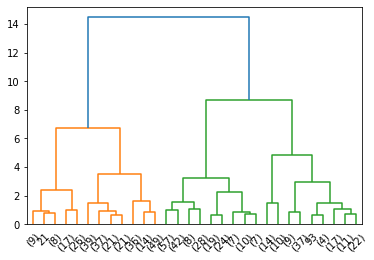

In [7]:
from os import truncate
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
link_mat = linkage(DataSet[DataSet['City'] == 'Delhi'][['LogRent','LogSize']], 'ward') # 
print(link_mat)
dendrogram(link_mat, truncate_mode='lastp')
plt.show()

[2 3 1 3 3 1 2 2 1 3 4 3 1 2 3 3 3 1 3 3 1 1 4 3 2 3 2 3 2 3 2 3 3 3 1 4 3
 3 4 1 3 3 2 4 4 2 4 2 2 3 1 3 1 2 4 4 2 2 3 1 3 4 2 4 3 3 2 4 4 1 4 2 3 2
 2 3 3 2 4 2 2 3 2 3 3 2 3 3 2 1 2 3 4 4 4 3 3 3 3 2 3 3 2 3 1 2 3 3 2 4 2
 3 3 2 2 4 3 3 3 2 3 2 4 2 4 2 3 2 4 2 2 2 2 3 2 2 2 4 4 3 2 2 2 4 2 4 2 2
 3 3 3 1 4 3 4 3 2 2 3 1 3 4 2 4 4 2 4 2 2 4 1 3 3 3 3 3 4 3 3 4 3 3 2 2 3
 3 4 2 2 2 4 1 1 2 2 1 4 4 3 3 3 2 3 4 4 4 3 4 3 1 3 2 3 1 2 2 1 4 2 4 2 3
 4 2 2 2 2 2 2 2 4 4 2 4 2 2 1 1 3 3 4 1 3 3 4 4 3 2 2 4 4 2 2 3 3 2 2 2 3
 2 1 2 2 3 4 4 4 3 3 3 2 3 3 3 4 4 4 2 4 3 3 2 2 2 2 2 2 2 2 2 2 3 3 4 1 2
 2 2 3 4 2 3 3 4 2 2 2 3 2 3 3 2 2 1 2 3 2 1 2 4 3 3 2 2 3 1 2 3 3 3 3 2 1
 4 3 4 1 3 3 2 2 3 2 4 4 3 1 2 3 3 2 3 4 3 3 4 2 2 3 1 3 2 4 4 4 1 2 2 1 2
 3 2 3 1 2 3 3 3 3 3 4 2 4 3 4 4 2 3 4 4 4 4 3 2 3 2 3 4 4 2 2 3 4 2 2 2 2
 3 3 3 4 3 1 2 4 2 2 2 4 2 3 3 3 2 4 1 3 3 4 3 2 4 4 3 2 2 3 2 2 3 1 1 2 2
 1 2 2 4 3 2 3 3 2 4 2 3 2 3 2 3 1 1 4 1 1 1 1 1 3 2 2 2 2 2 2 1 2 2 4 4 4
 4 4 2 2 3 2 1 4 4 2 3 2 

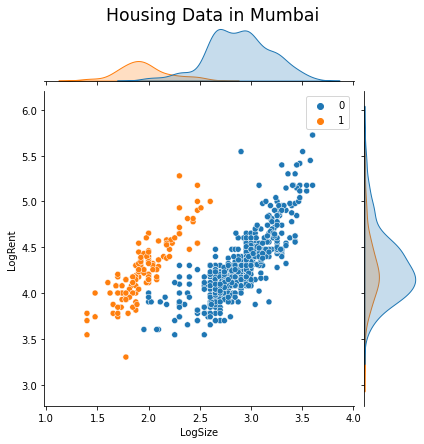

In [8]:

import matplotlib.pyplot as plt
n_clusters = 4 # Number of classes to get labels for
h_label = fcluster(link_mat,t=n_clusters,criterion='maxclust') # Getting the class labels
print(h_label)

for i in range(len(h_label)):
    if h_label[i] != 4:
        h_label[i] = 0
    else:
        h_label[i] = 1

g = sns.jointplot(data=DataSet[DataSet['City'] == 'Delhi'],x='LogSize',y='LogRent', hue=h_label)
g.fig.suptitle('Housing Data in Mumbai',size='xx-large',va='bottom')
plt.show()


In [9]:
floor = []
numfloor = []
for element in DataSet['Floor']:
    floor.append(element.split()[0])
    numfloor.append(element.split()[-1])

DataSet['NumberFloors'] = numfloor
DataSet['Level'] = floor
DataSet['NumberFloors'] = DataSet['NumberFloors'].replace('Ground' , 0)
DataSet['Level'] = DataSet['Level'].replace(to_replace='Ground',value=0)
DataSet['Level'] = DataSet['Level'].replace(to_replace='Lower',value=0)
DataSet.loc[DataSet['Level'] == 'Upper','Level'] = DataSet['NumberFloors']

DataSet['Level'] = pd.to_numeric(DataSet['Level']) + 1
 
DataSet['NumberFloors'] = pd.to_numeric(DataSet['NumberFloors']) + 1
DataSet['Height'] = DataSet['Level']/DataSet['NumberFloors']

In [10]:
import tensorflow as tf
print("num GPUs available:", len(tf.config.experimental.list_physical_devices("GPU")))
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from keras.models import Sequential
from keras.layers import Dense, BatchNormalization, Activation
from sklearn.preprocessing import RobustScaler, StandardScaler, MinMaxScaler

scaler = RobustScaler()
scaler2 = StandardScaler()

DataSet2 = pd.get_dummies(DataSet, columns=['Area Type','Area Locality','City','Furnishing Status','Tenant Preferred'])

q_high = DataSet2['Rent'].quantile(0.99)
q_low = DataSet2['Rent'].quantile(0.01)
DataSet2 = DataSet2[(DataSet2['Rent'] < q_high) & (DataSet2['Rent'] > q_low)]

print(DataSet2['Rent'].max())


X = DataSet2.drop(columns = ['Rent','Floor','LogRent','LogSize','Point of Contact','Posted On'])
y = DataSet2['Rent']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)
y_train_df = pd.DataFrame(data=y_train)

# Scaling the data
x_train_scaled = scaler.fit_transform(x_train)
y_train_scaled = scaler2.fit_transform(y_train_df)

x_train, x_val, y_train, y_val = train_test_split(x_train_scaled,y_train_scaled, test_size = 0.2)

num GPUs available: 0
290000


In [33]:
MSE_model = Sequential()
MSE_model.add(Dense(256, activation='relu', input_dim= len(X.columns)))
MSE_model.add(Dense(128))
MSE_model.add(BatchNormalization())
MSE_model.add(Activation('relu'))
MSE_model.add(Dense(128))
MSE_model.add(BatchNormalization())
MSE_model.add(Activation('relu'))
MSE_model.add(Dense(128))
MSE_model.add(BatchNormalization())
MSE_model.add(Activation('relu'))
MSE_model.add(Dense(1, activation = 'linear'))

MSE_model.compile(optimizer='adam',loss='mean_squared_error',metrics=['mean_absolute_percentage_error'])
MSE_model.summary()


Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 256)               577792    
                                                                 
 dense_28 (Dense)            (None, 128)               32896     
                                                                 
 batch_normalization_12 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 activation_6 (Activation)   (None, 128)               0         
                                                                 
 dense_29 (Dense)            (None, 128)               16512     
                                                                 
 batch_normalization_13 (Bat  (None, 128)              512       
 chNormalization)                                    

In [34]:
history = MSE_model.fit(x_train_scaled, y_train_scaled, epochs=100,validation_data=(x_val,y_val), verbose = False)



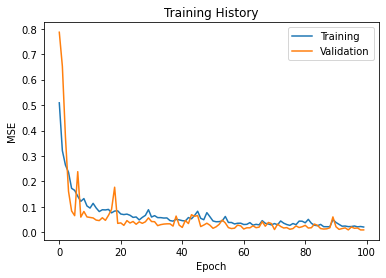

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training History')
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.legend(['Training','Validation'])
plt.show()

In [52]:
pred = scaler2.inverse_transform(MSE_model.predict(scaler.transform(x_test)))
real = y_test
pred_df = pd.DataFrame(data=pred)
real_df = pd.DataFrame(data=real)
real_df.reset_index(inplace=True)
real_df.drop(columns=['index'], inplace=True)



30/30 [==============================] - 0s 2ms/step


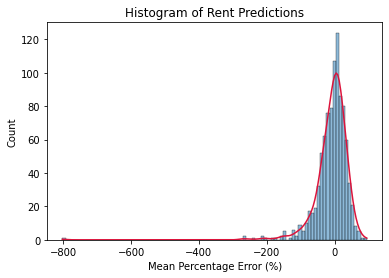

In [54]:
ax = sns.histplot((real_df['Rent'] - pred_df[0])/real_df['Rent']*100, kde=True)
ax.lines[0].set_color('crimson')
plt.title('Histogram of Rent Predictions')
plt.xlabel('Mean Percentage Error (%)')
plt.show()

# https://www.kaggle.com/code/zwhjorth/india-rental-market-eda-and-deep-learning